In [1]:
import pandas as pd

#### 1: chargement et fusionnement des données

In [2]:
ds1 = pd.read_csv('dataset_P1(Nov2013-June2014).csv', delimiter=';', decimal=',')

In [3]:
ds2 = pd.read_csv('dataset_P2(July2014-January2015).csv', delimiter=';', decimal=',')

In [4]:
ds2.rename(columns={'m':'Price'}, inplace=True)

In [5]:
ds = pd.concat([ds1, ds2])

In [6]:
ds

,Customer_ID,Date_purchase,Price
0,1,02/11/2013,69
1,2,04/11/2013,350
2,3,05/11/2013,69
3,4,07/11/2013,120
4,5,07/11/2013,120
...,...,...,...
5915,1715,26/08/2014,301.0
5916,1715,31/10/2014,35.0
5917,1715,27/09/2014,35.0
5918,1715,16/07/2014,248.0


#### 2 : nombre des valeurs manquants

In [7]:
ds.isna().sum()

Customer_ID       0
Date_purchase    15
Price            12
dtype: int64

#### 3 : les lignes qui ont au moins une valeur manquant

In [8]:
nands = ds[ds.isnull().any(axis=1)]

In [9]:
nands

,Customer_ID,Date_purchase,Price
65,36,NaN,784
194,57,01/12/2013,NaN
230,64,NaN,NaN
278,74,NaN,444
318,77,01/03/2014,NaN
351,81,NaN,343
453,94,NaN,NaN
519,104,NaN,97
584,113,NaN,48
636,123,08/03/2014,NaN


#### 4: Supression des lignes avec les donnees manquants

In [10]:
ds.dropna(inplace= True)

In [11]:
ds3 = ds

In [12]:
ds3.isnull().sum()

Customer_ID      0
Date_purchase    0
Price            0
dtype: int64

#### 5: Verfication des dates de transactions

In [13]:
ds3['Date_purchase'] = pd.to_datetime(ds3['Date_purchase'], errors='coerce', dayfirst=True)

In [14]:
ds3.dropna(inplace=True)

In [15]:
ds3.isna().sum()

Customer_ID      0
Date_purchase    0
Price            0
dtype: int64

In [16]:
ds3

,Customer_ID,Date_purchase,Price
0,1,2013-11-02,69
1,2,2013-11-04,350
2,3,2013-11-05,69
3,4,2013-11-07,120
4,5,2013-11-07,120
...,...,...,...
5915,1715,2014-08-26,301.0
5916,1715,2014-10-31,35.0
5917,1715,2014-09-27,35.0
5918,1715,2014-07-16,248.0


In [17]:
ds3 = pd.DataFrame(ds3.loc[(ds3['Date_purchase']<='2015-02-28') & (ds3['Date_purchase'] >='2013-11-01')])

In [18]:
ds3.describe(include = 'all', datetime_is_numeric=True)

,Customer_ID,Date_purchase,Price
count,12687.000000,12687,12687
unique,NaN,NaN,2264
top,NaN,NaN,31
freq,NaN,NaN,29
mean,739.297470,2014-06-11 17:01:37.895483392,NaN
min,1.000000,2013-11-01 00:00:00,NaN
25%,356.000000,2014-03-05 00:00:00,NaN
50%,632.000000,2014-06-15 00:00:00,NaN
75%,1122.000000,2014-09-23 00:00:00,NaN
max,1717.000000,2015-01-29 00:00:00,NaN


In [19]:
ds3

,Customer_ID,Date_purchase,Price
0,1,2013-11-02,69
1,2,2013-11-04,350
2,3,2013-11-05,69
3,4,2013-11-07,120
4,5,2013-11-07,120
...,...,...,...
5915,1715,2014-08-26,301.0
5916,1715,2014-10-31,35.0
5917,1715,2014-09-27,35.0
5918,1715,2014-07-16,248.0


#### 6 : Statistique du dataFrame

In [20]:
ds3['Price'] = pd.to_numeric(ds3['Price'], errors='coerce')

In [21]:
ds3

,Customer_ID,Date_purchase,Price
0,1,2013-11-02,69.0
1,2,2013-11-04,350.0
2,3,2013-11-05,69.0
3,4,2013-11-07,120.0
4,5,2013-11-07,120.0
...,...,...,...
5915,1715,2014-08-26,301.0
5916,1715,2014-10-31,35.0
5917,1715,2014-09-27,35.0
5918,1715,2014-07-16,248.0


In [71]:
ds3.describe()

,Customer_ID,Price
count,12687.000000,12686.000000
mean,739.297470,388.354801
std,465.792575,375.376216
min,1.000000,29.000000
25%,356.000000,150.000000
50%,632.000000,297.000000
75%,1122.000000,521.000000
max,1717.000000,7236.000000


#### 7 : le mois qui a le plus grands nombre de ventes 

In [22]:
month = ds3['Date_purchase'].dt.month
d = ds3.groupby(month).agg(['count', 'sum'])['Price']
d

C:\Users\Markt\AppData\Local\Temp\ipykernel_2268\4258250793.py:2: FutureWarning: ['Date_purchase'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  d = ds3.groupby(month).agg(['count', 'sum'])['Price']


,count,sum
Date_purchase,,
1,993,372940.0
2,856,329738.0
3,1014,390248.0
4,972,346718.0
5,908,338582.0
6,821,296689.0
7,940,338690.0
8,1054,404342.0
9,1008,412230.0


In [23]:
maxmonth = d['sum'].idxmax()

In [24]:
maxmonth

11

#### 8 : Graph des bars qui montre les mois avec le montant

<AxesSubplot:xlabel='Date_purchase'>

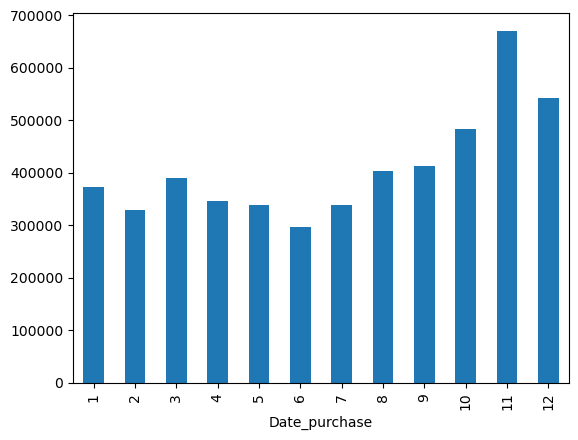

In [25]:
d['sum'].plot.bar()

In [26]:
from datetime import datetime

#### 9 : les variables par clients

In [27]:
newdt = pd.DataFrame(ds3.groupby('Customer_ID').agg(Frequence=('Customer_ID', 'count'), Recence=('Date_purchase', lambda x:(x.max() - datetime.strptime('2013-11-01', "%Y-%m-%d")).days), Longeur=('Date_purchase', lambda x: (x.max() - x.min()).days), Montant=('Price', 'sum'), Nbr1=('Date_purchase', lambda x: (x<=pd.to_datetime('30/06/2014')).sum()), Nbr2=('Date_purchase', lambda x: (x>pd.to_datetime('30/06/2014')).sum())))

C:\Users\Markt\AppData\Local\Temp\ipykernel_2268\3828940532.py:1: UserWarning: Parsing '30/06/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  newdt = pd.DataFrame(ds3.groupby('Customer_ID').agg(Frequence=('Customer_ID', 'count'), Recence=('Date_purchase', lambda x:(x.max() - datetime.strptime('2013-11-01', "%Y-%m-%d")).days), Longeur=('Date_purchase', lambda x: (x.max() - x.min()).days), Montant=('Price', 'sum'), Nbr1=('Date_purchase', lambda x: (x<=pd.to_datetime('30/06/2014')).sum()), Nbr2=('Date_purchase', lambda x: (x>pd.to_datetime('30/06/2014')).sum())))


In [28]:
newdt

,Frequence,Recence,Longeur,Montant,Nbr1,Nbr2
Customer_ID,,,,,,
1,1,1,0,69.0,1,0
2,1,3,0,350.0,1,0
3,1,4,0,69.0,1,0
4,1,6,0,120.0,1,0
5,1,6,0,120.0,1,0
...,...,...,...,...,...,...
1713,3,394,260,1464.0,2,1
1714,5,59,22,951.0,5,0
1715,12,405,399,2616.0,6,6


In [29]:
import numpy as np
newdt['inter_achat'] = np.where(newdt['Frequence']== 1, newdt['Longeur']/newdt['Frequence'], newdt['Longeur']/(newdt['Frequence']-1))
newdt

,Frequence,Recence,Longeur,Montant,Nbr1,Nbr2,inter_achat
Customer_ID,,,,,,,
1,1,1,0,69.0,1,0,0.000000
2,1,3,0,350.0,1,0,0.000000
3,1,4,0,69.0,1,0,0.000000
4,1,6,0,120.0,1,0,0.000000
5,1,6,0,120.0,1,0,0.000000
...,...,...,...,...,...,...,...
1713,3,394,260,1464.0,2,1,130.000000
1714,5,59,22,951.0,5,0,5.500000
1715,12,405,399,2616.0,6,6,36.272727


#### 10: statistique des clients 

In [30]:
newdt.describe().loc[['min', 'max', 'mean', 'std'], :]

,Frequence,Recence,Longeur,Montant,Nbr1,Nbr2,inter_achat
min,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000
max,20.000000,454.000000,440.000000,14805.000000,19.000000,19.000000,419.000000
mean,7.389051,273.792662,143.080373,2869.347117,3.941176,3.447874,37.966412
std,5.388092,135.632311,117.360856,2834.170644,3.759298,4.561071,57.330395


# Partie 2

1. On interpréte la valeur 0 d'inter_achat par: l'utilisateur n'a utilisé le site web durant qu'un seul jour.

In [31]:
moyenne_inter_achat = newdt[newdt['inter_achat'] != 0]['inter_achat'].mean()
moyenne_inter_achat

41.574190063135376

In [32]:
newdt['inter_achat'] = newdt['inter_achat'].replace(0, moyenne_inter_achat)

In [33]:
newdt

,Frequence,Recence,Longeur,Montant,Nbr1,Nbr2,inter_achat
Customer_ID,,,,,,,
1,1,1,0,69.0,1,0,41.574190
2,1,3,0,350.0,1,0,41.574190
3,1,4,0,69.0,1,0,41.574190
4,1,6,0,120.0,1,0,41.574190
5,1,6,0,120.0,1,0,41.574190
...,...,...,...,...,...,...,...
1713,3,394,260,1464.0,2,1,130.000000
1714,5,59,22,951.0,5,0,5.500000
1715,12,405,399,2616.0,6,6,36.272727


In [34]:
newdt.to_csv('LRFMP1P2IT.xlsx')

In [35]:
clust_df = pd.read_json('Clustering_Model_result.json')

In [36]:
clust_df

,Customer_ID,Frequency,Recency,Length,Monetary,Cluster
0,1,-1.185691,-2.011266,-1.219013,-0.988066,cluster_5
1,2,-1.185691,-1.996520,-1.219013,-0.888919,cluster_5
2,3,-1.185691,-1.989147,-1.219013,-0.988066,cluster_5
3,4,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
4,5,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
...,...,...,...,...,...,...
1712,1713,-0.814494,0.886274,0.996309,-0.495858,cluster_2
1713,1714,-0.443296,-1.583639,-1.031562,-0.676864,cluster_5
1714,1715,0.855894,0.967375,2.180654,-0.089390,cluster_1
1715,1716,-0.443296,-0.875843,-0.844112,0.006581,cluster_0


In [48]:
clust_id = clust_df[['Customer_ID', 'Cluster']]

In [38]:
newdt = pd.merge(newdt, clust_id, on = 'Customer_ID')

In [39]:
newdt

,Customer_ID,Frequence,Recence,Longeur,Montant,Nbr1,Nbr2,inter_achat,Cluster
0,1,1,1,0,69.0,1,0,41.574190,cluster_5
1,2,1,3,0,350.0,1,0,41.574190,cluster_5
2,3,1,4,0,69.0,1,0,41.574190,cluster_5
3,4,1,6,0,120.0,1,0,41.574190,cluster_5
4,5,1,6,0,120.0,1,0,41.574190,cluster_5
...,...,...,...,...,...,...,...,...,...
1712,1713,3,394,260,1464.0,2,1,130.000000,cluster_2
1713,1714,5,59,22,951.0,5,0,5.500000,cluster_5
1714,1715,12,405,399,2616.0,6,6,36.272727,cluster_1
1715,1716,5,155,44,2888.0,5,0,11.000000,cluster_0


In [40]:
df_f = pd.DataFrame(newdt.groupby('Cluster').agg(Count=('Customer_ID', 'count'), MeanL=('Longeur', 'mean'), MeanR=('Recence', 'mean'), MeanF=('Frequence', 'mean'), MeanM=('Montant', 'mean')))

In [41]:
df_f

,Count,MeanL,MeanR,MeanF,MeanM
Cluster,,,,,
cluster_0,262,93.896947,162.339695,7.423664,2644.549618
cluster_1,189,289.227513,379.830688,12.788360,4212.687831
cluster_2,339,271.362832,377.206490,5.147493,1723.233038
cluster_3,250,81.100000,378.832000,4.172000,1449.260000
cluster_4,138,210.717391,378.637681,15.014493,10454.202899
cluster_5,377,23.063660,83.185676,2.610080,891.283820
cluster_6,162,101.006173,306.092593,15.314815,4397.617284


In [42]:
meanLTotal = newdt['Longeur'].mean()
meanRTotal = newdt['Recence'].mean()
meanFTotal = newdt['Frequence'].mean()
meanMTotal = newdt['Montant'].mean()

In [43]:
def checkL(row):
  if row['MeanL'] > meanLTotal:
    return 'L'
  else:
    return 'l'

def checkR(row):
  if row['MeanR'] > meanRTotal:
    return 'R'
  else:
    return 'r'

def checkF(row):
  if row['MeanF'] > meanFTotal:
    return 'F'
  else:
    return 'f'

def checkM(row):
  if row['MeanM'] > meanMTotal:
    return 'M'
  else:
    return 'm'

In [44]:
df_f['LRFM-Pattern'] = df_f.apply(lambda row: checkL(row) + checkR(row) + checkF(row) + checkM(row), axis=1)

In [45]:
df_f

,Count,MeanL,MeanR,MeanF,MeanM,LRFM-Pattern
Cluster,,,,,,
cluster_0,262,93.896947,162.339695,7.423664,2644.549618,lrFm
cluster_1,189,289.227513,379.830688,12.788360,4212.687831,LRFM
cluster_2,339,271.362832,377.206490,5.147493,1723.233038,LRfm
cluster_3,250,81.100000,378.832000,4.172000,1449.260000,lRfm
cluster_4,138,210.717391,378.637681,15.014493,10454.202899,LRFM
cluster_5,377,23.063660,83.185676,2.610080,891.283820,lrfm
cluster_6,162,101.006173,306.092593,15.314815,4397.617284,lRFM


### Interpretation

**LRFM** : Ce sont des clients très précieux pour l'entreprise, qui achètent souvent et de manière récente, et qui dépensent de grandes sommes d'argent.

**lrFm** : le client a une valeur à vie relativement faible pour l'entreprise, qu'il n'achète pas souvent et que ses achats sont anciens, et qu'il ne dépense pas beaucoup d'argent à chaque achat.

**LRfm** : le client a une valeur à vie élevée pour l'entreprise, mais qu'il n'achète pas souvent et que ses achats sont récents, et qu'il ne dépense pas beaucoup d'argent à chaque achat.

**lRfm** : le client a une valeur à vie relativement faible pour l'entreprise, qu'il n'achète pas souvent et que ses achats sont récents, et qu'il ne dépense pas beaucoup d'argent à chaque achat.

**lrfm** : Ce sont des clients qui ne sont pas très précieux pour l'entreprise, qui n'achètent pas souvent et dont les achats sont anciens, et qui ne dépensent pas beaucoup d'argent à chaque achat.

In [50]:
group_by_cluster = newdt.groupby(by='Cluster').agg(Transactions=('Frequence','sum'),
                                                                 Client_Per_Cluster=('Customer_ID','count'),
                                                                 TotalDepense=('Montant','sum'),
                                                                 Panier_Moyen=('Montant','mean')
                                                                ).reset_index()
group_by_cluster

,Cluster,Transactions,Client_Per_Cluster,TotalDepense,Panier_Moyen
0,cluster_0,1945,262,692872.0,2644.549618
1,cluster_1,2417,189,796198.0,4212.687831
2,cluster_2,1745,339,584176.0,1723.233038
3,cluster_3,1043,250,362315.0,1449.260000
4,cluster_4,2072,138,1442680.0,10454.202899
5,cluster_5,984,377,336014.0,891.283820
6,cluster_6,2481,162,712414.0,4397.617284


In [65]:
import matplotlib.pyplot as plt

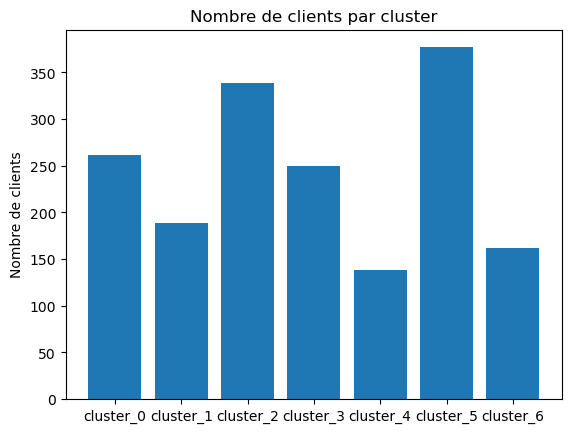

In [70]:
plt.bar(group_by_cluster['Cluster'], group_by_cluster['Client_Per_Cluster'])
plt.title('Nombre de clients par cluster')
plt.ylabel('Nombre de clients')
plt.show()

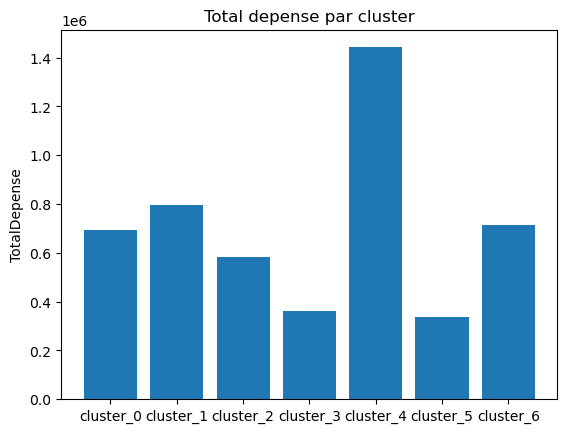

In [54]:
plt.bar(group_by_cluster['Cluster'], group_by_cluster['TotalDepense'])
plt.title('Total depense par cluster')
plt.ylabel('TotalDepense')
plt.show()

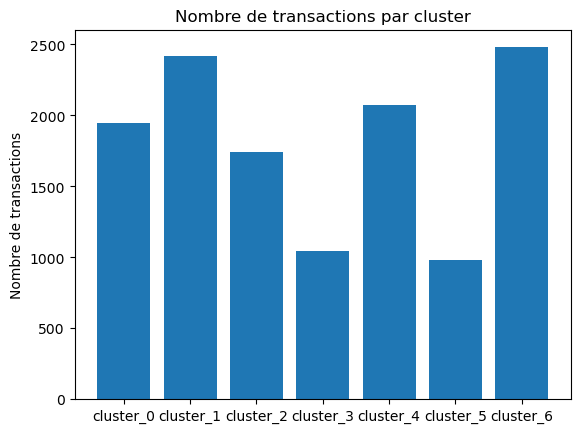

In [55]:
plt.bar(group_by_cluster['Cluster'], group_by_cluster['Transactions'])
plt.title('Nombre de transactions par cluster')
plt.ylabel('Nombre de transactions')
plt.show()

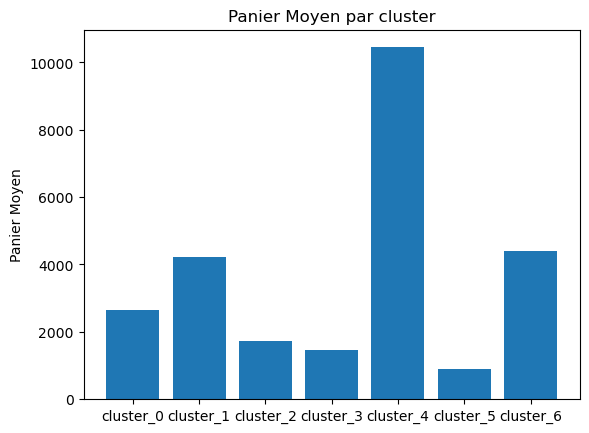

In [56]:
plt.bar(group_by_cluster['Cluster'], group_by_cluster['Panier_Moyen'])
plt.title('Panier Moyen par cluster')
plt.ylabel('Panier Moyen')
plt.show()